In [21]:
from autograd import V, L, F 
from optimiser import SGD, Momentum, Adagrad, Adam
import matplotlib.pyplot as plt
import numpy as np

W1 = V.randn((1, 100), requires_grad=True, name='W1')
b1 = V.randn((100,), requires_grad=True, name='b1')

W2 = V.randn((100, 1), requires_grad=True, name='W1')
b2 = V.randn((1,), requires_grad=True, name='b1')

def model(x):
    x = x @ W1 + b1
    x = F.relu(x)
    x = x @ W2 + b2
    return x

# Function to match
def f(x):
    return x**2 + x*2 + 1

# Training data
def get_data():
    x = V.uniform((100,1), 0.0, 10.0)
    y = f(x)
    return x, y

loss = L.huberloss
optimiser = Adam(W1, b1)

losses = []

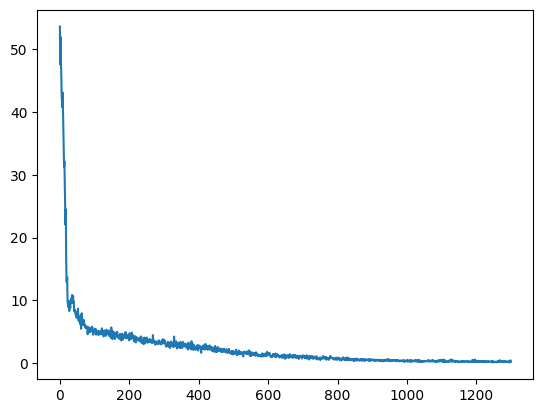

In [29]:
for e in range(1000):
    x, y = get_data()

    y_pred = model(x)
    loss_val = loss(y_pred, y, keepdims=False)
    loss_val.backward()
    optimiser.step()

    losses.append(loss_val.item())

plt.plot(losses)
plt.show()

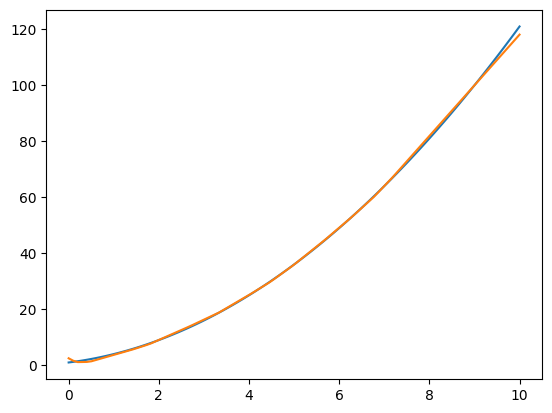

In [30]:
xs = [x for x in np.linspace(0.0, 10.0, 100)]
ys = [f(V.of(x)).item() for x in xs]
ys_pred = [model(V.of([x])).item() for x in xs]

plt.plot(xs, ys, label='f(x)')
plt.plot(xs, ys_pred, label='model(x)')
plt.show()